# Import Required Libraries
Import the necessary libraries, such as requests, for making API calls.

In [3]:
# Import the necessary library for making API calls
# Install necessary libraries
'''%pip install requests
%pip install pandas
%pip install datetime
%pip install cudf
%pip install cupy
%pip install openpyxl
%pip install textblob
%pip install transformers
%pip install torch
%pip install import-ipynb'''

# Import libraries
import import_ipynb
from Input_Tools import *
import requests
import pandas as pd
import datetime as dt
import numpy as np
import os as os
from textblob import TextBlob
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt
import matplotlib.pyplot as mdates

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Define API Key
Define the API key

In [4]:
API_Eodhd = "66c0aeb1357b15.87356825"

#Important link: https://eodhd.com/financial-academy/financial-faq/fundamentals-glossary-common-stock


# Filtering using a stock screener
Filters stock based on market capitalization

In [36]:
def fetch_stocks_by_market_cap_and_exchange(market_cap, exchange):
    """
    Fetch stocks filtered by market capitalization and exchange.

    Parameters:
        market_cap (int): Minimum market capitalization.
        exchange (str): Exchange code.

    Returns:
        pd.DataFrame: DataFrame containing the filtered stocks with name and stock code.
    """
    # Construct the URL with the provided arguments
    url = f'https://eodhd.com/api/screener?api_token={API_Eodhd}&sort=market_capitalization.desc&filters=[["market_capitalization",">",{market_cap}],["exchange","=","{exchange}"]]&limit=500&offset=0'

    # Fetch the response
    response = requests.get(url)

    # Check if the response is valid JSON
    if response.status_code == 200:
        try:
            data = response.json()
            
            # Convert the response to a pandas DataFrame
            df = pd.DataFrame(data.get('data', []))
            
            # Filter to only include name and stock code
            df['Stock_name'] = df['code'] + '.' + df['exchange']
            filtered_df = df[['name', 'Stock_name']]
            return filtered_df
        except ValueError:
            return pd.DataFrame()
    else:
        return pd.DataFrame()

In [37]:
print(fetch_exchanges_list().head(50))

                             Name   Code         Country Currency
0                      USA Stocks     US             USA      USD
1                 London Exchange    LSE              UK      GBP
2                    NEO Exchange    NEO          Canada      CAD
3            TSX Venture Exchange      V          Canada      CAD
4                Toronto Exchange     TO          Canada      CAD
5                 Berlin Exchange     BE         Germany      EUR
6                Hamburg Exchange     HM         Germany      EUR
7            XETRA Stock Exchange  XETRA         Germany      EUR
8             Dusseldorf Exchange     DU         Germany      EUR
9              Frankfurt Exchange      F         Germany      EUR
10                Munich Exchange     MU         Germany      EUR
11               Hanover Exchange     HA         Germany      EUR
12             Stuttgart Exchange    STU         Germany      EUR
13      Luxembourg Stock Exchange     LU      Luxembourg      EUR
14        

In [38]:
# Define the list of exchanges
exchange_list = ["PA", "AS","LSE","VI","MC","US"]

# Initialize an empty list to store DataFrames
combined_data = []

# Loop through each exchange and fetch the data
for exchange in exchange_list:
    df = fetch_stocks_by_market_cap_and_exchange(10000000000, exchange)
    combined_data.append(df)

# Combine all DataFrames into a single DataFrame
stock_list = pd.concat(combined_data, ignore_index=True)

# Display the combined DataFrame
print(stock_list)

                                                   name Stock_name
0                              Hermes International SCA     RMS.PA
1     LVMH Moët Hennessy - Louis Vuitton Société Eur...      MC.PA
2                                            L’Oreal SA      OR.PA
3                               Schneider Electric S.E.      SU.PA
4                                      TotalEnergies SE     TTE.PA
...                                                 ...        ...
1113                                      Volkswagen AG   VLKAF.US
1114                             Volkswagen AG 1/10 ADR   VWAGY.US
1115                        Volkswagen AG Pref 1/10 ADR   VWAPY.US
1116                             Volkswagen AG VZO O.N.   VLKPF.US
1117                                 Wesfarmers Limited   WFAFF.US

[1118 rows x 2 columns]


# Obtaining stock list
Retrives stock list from an excel file

In [39]:
# Retrives to get the list of all available tickers

# Define the path to the Excel file
excel_file_path_stocklist = r"E:\Business_NL\Python\stock_list.xlsx"
excel_file_path_portfolio = r"E:\Business_NL\Python\Portfolio_list.xlsx"

# Read column C from the Excel file into a pandas DataFrame
# Assuming column C contains the data you need and has a header
portfolio_list_stock = pd.read_excel(excel_file_path_portfolio, usecols="C")
portfolio_list_quantity = pd.read_excel(excel_file_path_portfolio, usecols="D")

print(portfolio_list_stock.head())


  Stock_name
0    IUSA.AS
1     CVX.US
2    MDLZ.US


# Filtering the stocks with required conditions
Filtering stocks that has more than 10 million average trading volume

In [40]:
'''# Define the start and end dates
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=30)

# Define the filter amount
filter_amount = 10 * 10**6

# Initialize an empty list to store the results
average_dtv_list = []

# Loop through each ticker in the stock list
for ticker in stock_list["Stock_name"]:  # Assuming the column name is "Stock_name"
    try:
        # Fetch historical price data
        stock_data = Fetch_historical_price(f"{ticker}", start_date, end_date, period="d", columns=["adjusted_close", "volume"])
        
        # Calculate the Daily Trading Volume (DTV)
        stock_data["DTV"] = stock_data["adjusted_close"] * stock_data["volume"]
        
        # Calculate the average DTV
        avg_dtv = stock_data["DTV"].mean()
        
        # Append the stock name and average DTV to the list if it meets the filter condition
        if avg_dtv > filter_amount:
            average_dtv_list.append({"Stock": ticker, "Average_DTV": avg_dtv})
    except Exception as e:
        print(f"Error processing {ticker}: {e}")

# Convert the list to a DataFrame
filtered_stock_list = pd.DataFrame(average_dtv_list)

# Display the resulting DataFrame
print(filtered_stock_list)'''

'# Define the start and end dates\nend_date = dt.datetime.now()\nstart_date = end_date - dt.timedelta(days=30)\n\n# Define the filter amount\nfilter_amount = 10 * 10**6\n\n# Initialize an empty list to store the results\naverage_dtv_list = []\n\n# Loop through each ticker in the stock list\nfor ticker in stock_list["Stock_name"]:  # Assuming the column name is "Stock_name"\n    try:\n        # Fetch historical price data\n        stock_data = Fetch_historical_price(f"{ticker}", start_date, end_date, period="d", columns=["adjusted_close", "volume"])\n\n        # Calculate the Daily Trading Volume (DTV)\n        stock_data["DTV"] = stock_data["adjusted_close"] * stock_data["volume"]\n\n        # Calculate the average DTV\n        avg_dtv = stock_data["DTV"].mean()\n\n        # Append the stock name and average DTV to the list if it meets the filter condition\n        if avg_dtv > filter_amount:\n            average_dtv_list.append({"Stock": ticker, "Average_DTV": avg_dtv})\n    except Ex

In [41]:
# Optimized version using ThreadPoolExecutor for parallel processing

from concurrent.futures import ThreadPoolExecutor
import pandas as pd

# Define the start and end dates
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=30)

# Define the filter amount
filter_amount = 10 * 10**6

# Function to process a single ticker
def process_ticker(ticker):
    try:
        # Fetch historical price data
        stock_data = Fetch_historical_price(
            ticker, start_date, end_date, period="d", columns=["adjusted_close", "volume"]
        )
        
        # Calculate the Daily Trading Volume (DTV) and its average
        avg_dtv = (stock_data["adjusted_close"] * stock_data["volume"]).mean()
        
        # Return the result if it meets the filter condition
        if avg_dtv > filter_amount:
            return {"Stock": ticker, "Average_DTV": avg_dtv}
    except Exception as e:
        print(f"Error processing {ticker}: {e}")
    return None

# Use ThreadPoolExecutor for parallel processing
with ThreadPoolExecutor() as executor:
    results = list(executor.map(process_ticker, stock_list["Stock_name"]))

# Filter out None results and convert to a DataFrame
average_dtv_list = [result for result in results if result is not None]
filtered_stock_list = pd.DataFrame(average_dtv_list)

# Display the resulting DataFrame
print(filtered_stock_list)

        Stock   Average_DTV
0      RMS.PA  2.044823e+08
1       MC.PA  4.361090e+08
2       OR.PA  2.155232e+08
3       SU.PA  3.055453e+08
4      TTE.PA  3.034792e+08
..        ...           ...
496    BCS.US  2.506303e+08
497     BK.US  3.518432e+08
498    COR.US  5.883638e+08
499  HKXCY.US  1.028964e+07
500    HWM.US  3.733660e+08

[501 rows x 2 columns]


# Creating my portfolio
Retriving my portfolio information

In [42]:
# Define the start and end dates
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=30)

# Getting portfolio information
portfolio_stocks = portfolio_list_stock["Stock_name"]
portfolio_quantity = portfolio_list_quantity["Quantity"]
Margin_amount = 14000

# Initializing the portfolio DataFrame
portfolio_init = pd.DataFrame({
    "Stock": portfolio_stocks,
    "Quantity": portfolio_quantity
})

# Define the start and end dates
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=30)

# Initialize a DataFrame to store daily portfolio values
daily_portfolio_values = pd.DataFrame()

# Loop through each ticker in the portfolio
for index, row in portfolio_init.iterrows():
    ticker = row["Stock"]
    quantity = row["Quantity"]
    try:
        # Fetch historical price data (adjusted close prices)
        stock_data = Fetch_historical_price(
            f"{ticker}", start_date, end_date, period="d", columns=["adjusted_close"]
        )
        
        # Add a column for the stock's daily value (price * quantity)
        stock_data["Daily_Value"] = stock_data["adjusted_close"] * quantity
        
        # Add the stock's daily value to the portfolio DataFrame
        if daily_portfolio_values.empty:
            daily_portfolio_values = stock_data[["date", "Daily_Value"]].rename(columns={"Daily_Value": ticker})
        else:
            daily_portfolio_values = daily_portfolio_values.merge(
                stock_data[["date", "Daily_Value"]].rename(columns={"Daily_Value": ticker}),
                on="date",
                how="outer"
            )
    except Exception as e:
        print(f"Error processing {ticker}: {e}")

# Calculate the total portfolio value for each day
daily_portfolio_values["Total_Portfolio_Value"] = daily_portfolio_values.drop(columns=["date"]).sum(axis=1) - Margin_amount

# Add the margin amount as a column
daily_portfolio_values["Margin_Amount"] = Margin_amount

# Drop rows with NaN values
daily_portfolio_values = daily_portfolio_values.dropna()

# Display the daily portfolio values
print(daily_portfolio_values)

          date    IUSA.AS    CVX.US   MDLZ.US  Total_Portfolio_Value  \
0   2025-03-28  43582.112  571.3496  675.8625             30829.3241   
1   2025-03-31  43354.000  575.4776  681.8925             30611.3701   
2   2025-04-01  44014.592  579.6744  679.8825             31274.1489   
3   2025-04-02  43974.736  572.6568  664.6065             31211.9993   
4   2025-04-03  41645.280  537.0528  682.3950             28864.7278   
5   2025-04-04  39870.416  492.8832  666.4155             27029.7147   
6   2025-04-07  38683.216  482.1160  655.5615             25820.8935   
7   2025-04-08  40091.744  471.0392  643.8030             27206.5862   
8   2025-04-09  38132.864  502.3432  665.2095             25300.4167   
9   2025-04-10  39626.192  464.3312  663.0990             26753.6222   
10  2025-04-11  39112.304  466.5672  673.8525             26252.7237   
11  2025-04-14  40235.056  465.5008  686.4150             27386.9718   
12  2025-04-15  40523.376  462.8176  673.6515             27659.

# Plotting the daily returns
Plotting the daily returns of portfolio and the filtered stocks

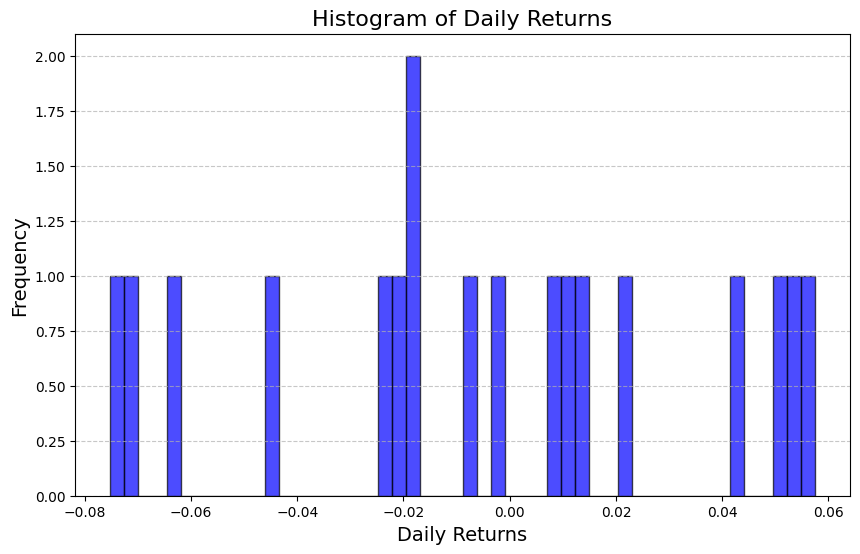

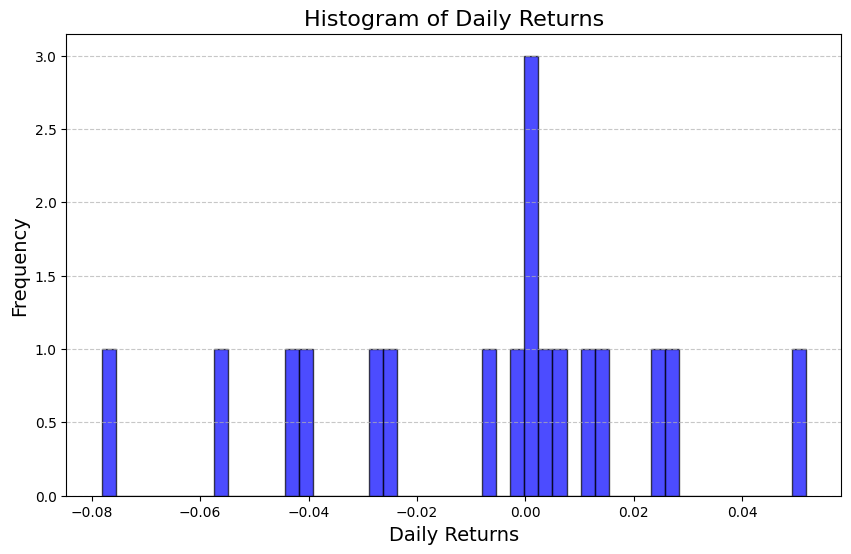

In [43]:
# Define the start and end dates -- Make sure it matches the previous cell
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=30)

# Calculate daily returns for Total_Portfolio_Value
daily_portfolio_values['daily_return'] = daily_portfolio_values['Total_Portfolio_Value'].pct_change()
daily_portfolio_returns = daily_portfolio_values.dropna()

# Getting stock list for daily returns
filtered_stock_name = filtered_stock_list["Stock"] 

# Calculating the daily returns for all the stocks in the list
daily_returns = calculate_daily_returns(filtered_stock_name[1], start_date, end_date, "d")


# Plot a histogram of the daily portfolio returns
plt.figure(figsize=(10, 6))
plt.hist(daily_portfolio_returns['daily_return'], bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Daily Returns', fontsize=16)
plt.xlabel('Daily Returns', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot a histogram of the daily stock returns
plt.figure(figsize=(10, 6))
plt.hist(daily_returns['daily_return'], bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Daily Returns', fontsize=16)
plt.xlabel('Daily Returns', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Extracting correlation
Calculating correclation of all stocks with portfolio

In [44]:
'''# Define the start and end dates -- Make sure it matches the previous cell
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=30)

# Calculate daily returns for Total_Portfolio_Value
daily_portfolio_values['daily_return'] = daily_portfolio_values['Total_Portfolio_Value'].pct_change()
daily_portfolio_returns = daily_portfolio_values.dropna()

# Initialize a dictionary to store correlations
correlations = {}

# Loop through each stock in the filtered_stock_name
for stock in filtered_stock_name:
    try:
        # Fetch historical price data for the stock
        stock_data = Fetch_historical_price(stock, start_date, end_date, period="d", columns=["adjusted_close"])
        
        # Calculate daily returns for the stock
        stock_data['daily_return'] = stock_data['adjusted_close'].pct_change()
        stock_data = stock_data.dropna()
        
        # Merge the stock's daily returns with the portfolio's daily returns
        merged_data = pd.merge(
            daily_portfolio_returns[['date', 'daily_return']],
            stock_data[['date', 'daily_return']],
            on='date',
            suffixes=('_portfolio', f'_{stock}')
        )
        
        # Calculate the correlation
        correlation = merged_data['daily_return_portfolio'].corr(merged_data[f'daily_return_{stock}'])
        correlations[stock] = correlation
    except Exception as e:
        print(f"Error processing {stock}: {e}")


# Convert the correlations dictionary to a DataFrame
correlations_df = pd.DataFrame(list(correlations.items()), columns=['Stock', 'Correlation_with_Portfolio'])

# Display the resulting DataFrame
print(correlations_df)'''

'# Define the start and end dates -- Make sure it matches the previous cell\nend_date = dt.datetime.now()\nstart_date = end_date - dt.timedelta(days=30)\n\n# Calculate daily returns for Total_Portfolio_Value\ndaily_portfolio_values[\'daily_return\'] = daily_portfolio_values[\'Total_Portfolio_Value\'].pct_change()\ndaily_portfolio_returns = daily_portfolio_values.dropna()\n\n# Initialize a dictionary to store correlations\ncorrelations = {}\n\n# Loop through each stock in the filtered_stock_name\nfor stock in filtered_stock_name:\n    try:\n        # Fetch historical price data for the stock\n        stock_data = Fetch_historical_price(stock, start_date, end_date, period="d", columns=["adjusted_close"])\n\n        # Calculate daily returns for the stock\n        stock_data[\'daily_return\'] = stock_data[\'adjusted_close\'].pct_change()\n        stock_data = stock_data.dropna()\n\n        # Merge the stock\'s daily returns with the portfolio\'s daily returns\n        merged_data = pd.mer

In [45]:
# Optimized version using ThreadPoolExecutor for parallel processing

# Import necessary libraries
from concurrent.futures import ThreadPoolExecutor

# Define the start and end dates -- Make sure it matches the previous cell
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=30)

# Calculate daily returns for Total_Portfolio_Value
daily_portfolio_values['daily_return'] = daily_portfolio_values['Total_Portfolio_Value'].pct_change()
daily_portfolio_returns = daily_portfolio_values.dropna()

# Function to process a single stock
def process_stock(stock):
    try:
        # Fetch historical price data for the stock
        stock_data = Fetch_historical_price(stock, start_date, end_date, period="d", columns=["adjusted_close"])
        
        # Calculate daily returns for the stock
        stock_data['daily_return'] = stock_data['adjusted_close'].pct_change()
        stock_data = stock_data.dropna()
        
        # Merge the stock's daily returns with the portfolio's daily returns
        merged_data = pd.merge(
            daily_portfolio_returns[['date', 'daily_return']],
            stock_data[['date', 'daily_return']],
            on='date',
            suffixes=('_portfolio', f'_{stock}')
        )
        
        # Calculate the correlation
        correlation = merged_data['daily_return_portfolio'].corr(merged_data[f'daily_return_{stock}'])
        return stock, correlation
    except Exception as e:
        print(f"Error processing {stock}: {e}")
        return stock, None

# Use ThreadPoolExecutor for parallel processing
with ThreadPoolExecutor() as executor:
    results = list(executor.map(process_stock, filtered_stock_name))

# Convert the results to a DataFrame
correlations_df = pd.DataFrame(results, columns=['Stock', 'Correlation_with_Portfolio'])

# Drop rows with None correlations
correlations_df = correlations_df.dropna()

# Display the resulting DataFrame
print(correlations_df)

        Stock  Correlation_with_Portfolio
0      RMS.PA                    0.810345
1       MC.PA                    0.696430
2       OR.PA                    0.547973
3       SU.PA                    0.906959
4      TTE.PA                    0.791018
..        ...                         ...
496    BCS.US                    0.186528
497     BK.US                    0.046044
498    COR.US                    0.064241
499  HKXCY.US                    0.078382
500    HWM.US                    0.080530

[501 rows x 2 columns]


# Filtering stocks based on correaltion

In [46]:
# filter the correaltions_df
max_correlation = 0.4

filtered_correlations_df = correlations_df[correlations_df['Correlation_with_Portfolio'] < max_correlation]
print(filtered_correlations_df)

        Stock  Correlation_with_Portfolio
15      BN.PA                    0.342556
17    ENGI.PA                    0.371614
19     ORA.PA                   -0.126237
45      CA.PA                    0.382415
49     UNA.AS                    0.377901
..        ...                         ...
496    BCS.US                    0.186528
497     BK.US                    0.046044
498    COR.US                    0.064241
499  HKXCY.US                    0.078382
500    HWM.US                    0.080530

[314 rows x 2 columns]


# Creating a 6% dividend yield model
Calculates the stock price based on a 6% dividend yield

In [47]:
# Fetching dividend share for stocks

def Fetch_dividend_share(tickers_df):
    """
    Fetch dividend share for all stocks in the tickers_df and combine them into a single DataFrame.

    Parameters:
        tickers_df (list or pd.Series): List of stock tickers (e.g., ["INGA.AS", "ASML.AS"]).

    Returns:
        pd.DataFrame: A DataFrame with two columns: 'Ticker' and 'Dividendshare'.
    """
    combined_data = []  # Initialize an empty list to store data

    for stock in tickers_df:
        try:
            # Fetch the dividend share for the current stock
            url = f'https://eodhd.com/api/fundamentals/{stock}?api_token={API_Eodhd}&filter=Highlights::DividendShare&fmt=json'
            dividend_share = requests.get(url).json()

            # Append the stock and dividend yield to the list
            combined_data.append({"Ticker": stock, "Dividendshare": dividend_share})
        except Exception as e:
            print(f"Error fetching data for {stock}: {e}")

    # Convert the combined data into a DataFrame
    combined_df = pd.DataFrame(combined_data)

    # Drop rows with missing dividend yield values
    combined_df = combined_df.dropna(subset=["Dividendshare"])

    return combined_df


def Fetch_dividend_yield(tickers_df):
    """
    Fetch dividend share for all stocks in the tickers_df and combine them into a single DataFrame.

    Parameters:
        tickers_df (list or pd.Series): List of stock tickers (e.g., ["INGA.AS", "ASML.AS"]).

    Returns:
        pd.DataFrame: A DataFrame with two columns: 'Ticker' and 'Dividendshare'.
    """
    combined_data = []  # Initialize an empty list to store data

    for stock in tickers_df:
        try:
            # Fetch the dividend share for the current stock
            url = f'https://eodhd.com/api/fundamentals/{stock}?api_token={API_Eodhd}&filter=Highlights::DividendYield&fmt=json'
            dividend_yield = requests.get(url).json()

            # Append the stock and dividend yield to the list
            combined_data.append({"Ticker": stock, "Dividend_yield": dividend_yield*100})
        except Exception as e:
            print(f"Error fetching data for {stock}: {e}")

    # Convert the combined data into a DataFrame
    combined_df = pd.DataFrame(combined_data)

    # Drop rows with missing dividend yield values
    combined_df = combined_df.dropna(subset=["Dividend_yield"])

    return combined_df

'''# Fetch dividend share for the filtered stock list
dividend_share_df = Fetch_dividend_yield(filtered_correlations_df["Stock"])
print(dividend_share_df.head())

print(Fetch_dividend_share(["KPN.AS"]))'''


'# Fetch dividend share for the filtered stock list\ndividend_share_df = Fetch_dividend_yield(filtered_correlations_df["Stock"])\nprint(dividend_share_df.head())\n\nprint(Fetch_dividend_share(["KPN.AS"]))'

In [48]:
'''# Calculating theoretical stock price, potential, and fetching current dividend yield

# Fetch dividend share for the filtered stock list
Dividend_share = Fetch_dividend_share(filtered_correlations_df["Stock"])

Theoretical_DY = 0.06

# Ensure 'Dividendshare' is numeric, replace non-numeric values with 0
Dividend_share["Dividendshare"] = pd.to_numeric(Dividend_share["Dividendshare"], errors='coerce').fillna(0)

# Calculate the theoretical stock price, handling division by zero
Dividend_share["TheoreticalStockPrice"] = np.where(
    Theoretical_DY != 0,  # Check if the denominator is not zero
    Dividend_share["Dividendshare"] / Theoretical_DY,  # Perform the division
    0  # Return 0 if the denominator is zero
)

# Initialize a list to store the average 30-day stock price for each stock
avg_price_list = []

# Loop through each stock in the filtered list
for stock in filtered_correlations_df["Stock"]:
    try:
        # Fetch historical price data 
        stock_data = Fetch_historical_price(stock, start_date, end_date, period="d", columns=["adjusted_close"])
        
        # Calculate the average of the adjusted close prices
        avg_price = stock_data["adjusted_close"].mean()
        avg_price_list.append({"Ticker": stock, "avg_price": avg_price})
    except Exception as e:
        print(f"Error fetching data for {stock}: {e}")
        avg_price_list.append({"Ticker": stock, "avg_price": None})

# Convert the list to a DataFrame
avg_price_df = pd.DataFrame(avg_price_list)

# Merge the average 30-day prices with the Dividend_share DataFrame
Dividend_share = Dividend_share.merge(avg_price_df, left_on="Ticker", right_on="Ticker")

# Calculate the potential, handling division by zero
Dividend_share["Potential"] = np.where(
    Dividend_share["avg_price"] != 0,  # Check if the denominator is not zero
    (Dividend_share["TheoreticalStockPrice"] - Dividend_share["avg_price"]) * 100 / Dividend_share["avg_price"],  # Perform the calculation
    0  # Return 0 if the denominator is zero
)

# Fetch the current dividend yield for the filtered stock list
dividend_yield_df = Fetch_dividend_yield(filtered_correlations_df["Stock"])

# Merge the dividend yield with the Dividend_share DataFrame
Dividend_share = Dividend_share.merge(dividend_yield_df, left_on="Ticker", right_on="Ticker", how="left")

# Round the specified columns to 2 decimal places
Dividend_share["TheoreticalStockPrice"] = Dividend_share["TheoreticalStockPrice"].round(2)
Dividend_share["avg_price"] = Dividend_share["avg_price"].round(2)
Dividend_share["Potential"] = Dividend_share["Potential"].round(2)
Dividend_share["Dividend_yield"] = Dividend_share["Dividend_yield"].round(2)

# Display the updated DataFrame
print(Dividend_share[["Ticker","Dividend_yield" ,"avg_price", "TheoreticalStockPrice", "Potential"]])'''


'# Calculating theoretical stock price, potential, and fetching current dividend yield\n\n# Fetch dividend share for the filtered stock list\nDividend_share = Fetch_dividend_share(filtered_correlations_df["Stock"])\n\nTheoretical_DY = 0.06\n\n# Ensure \'Dividendshare\' is numeric, replace non-numeric values with 0\nDividend_share["Dividendshare"] = pd.to_numeric(Dividend_share["Dividendshare"], errors=\'coerce\').fillna(0)\n\n# Calculate the theoretical stock price, handling division by zero\nDividend_share["TheoreticalStockPrice"] = np.where(\n    Theoretical_DY != 0,  # Check if the denominator is not zero\n    Dividend_share["Dividendshare"] / Theoretical_DY,  # Perform the division\n    0  # Return 0 if the denominator is zero\n)\n\n# Initialize a list to store the average 30-day stock price for each stock\navg_price_list = []\n\n# Loop through each stock in the filtered list\nfor stock in filtered_correlations_df["Stock"]:\n    try:\n        # Fetch historical price data \n       

In [49]:
#Optimzed version using ThreadPoolExecutor for parallel processing

from concurrent.futures import ThreadPoolExecutor

# Fetch dividend share for the filtered stock list
Dividend_share = Fetch_dividend_share(filtered_correlations_df["Stock"])

Theoretical_DY = 0.06

# Ensure 'Dividendshare' is numeric, replace non-numeric values with 0
Dividend_share["Dividendshare"] = pd.to_numeric(Dividend_share["Dividendshare"], errors='coerce').fillna(0)

# Calculate the theoretical stock price, handling division by zero
Dividend_share["TheoreticalStockPrice"] = np.where(
    Theoretical_DY != 0,  # Check if the denominator is not zero
    Dividend_share["Dividendshare"] / Theoretical_DY,  # Perform the division
    0  # Return 0 if the denominator is zero
)

# Function to fetch and calculate the average price for a single stock
def fetch_avg_price(stock):
    try:
        # Fetch historical price data
        stock_data = Fetch_historical_price(stock, start_date, end_date, period="d", columns=["adjusted_close"])
        
        # Calculate the average of the adjusted close prices
        avg_price = stock_data["adjusted_close"].mean()
        return {"Ticker": stock, "avg_price": avg_price}
    except Exception as e:
        print(f"Error fetching data for {stock}: {e}")
        return {"Ticker": stock, "avg_price": None}

# Use ThreadPoolExecutor for parallel processing
with ThreadPoolExecutor() as executor:
    avg_price_list = list(executor.map(fetch_avg_price, filtered_correlations_df["Stock"]))

# Convert the list to a DataFrame
avg_price_df = pd.DataFrame(avg_price_list)

# Merge the average 30-day prices with the Dividend_share DataFrame
Dividend_share = Dividend_share.merge(avg_price_df, left_on="Ticker", right_on="Ticker")

# Calculate the potential, handling division by zero
Dividend_share["Potential"] = np.where(
    Dividend_share["avg_price"] != 0,  # Check if the denominator is not zero
    (Dividend_share["TheoreticalStockPrice"] - Dividend_share["avg_price"]) * 100 / Dividend_share["avg_price"],  # Perform the calculation
    0  # Return 0 if the denominator is zero
)

# Fetch the current dividend yield for the filtered stock list
dividend_yield_df = Fetch_dividend_yield(filtered_correlations_df["Stock"])

# Merge the dividend yield with the Dividend_share DataFrame
Dividend_share = Dividend_share.merge(dividend_yield_df, left_on="Ticker", right_on="Ticker", how="left")

# Round the specified columns to 2 decimal places
Dividend_share["TheoreticalStockPrice"] = Dividend_share["TheoreticalStockPrice"].round(2)
Dividend_share["avg_price"] = Dividend_share["avg_price"].round(2)
Dividend_share["Potential"] = Dividend_share["Potential"].round(2)
Dividend_share["Dividend_yield"] = Dividend_share["Dividend_yield"].round(2)

# Display the updated DataFrame
print(Dividend_share[["Ticker", "Dividend_yield", "avg_price", "TheoreticalStockPrice", "Potential"]])

       Ticker Dividend_yield  avg_price  TheoreticalStockPrice  Potential
0       BN.PA           2.88      72.12                  35.83     -50.32
1     ENGI.PA           8.49      16.87                  24.67      46.24
2      ORA.PA           6.08      12.25                  12.50       2.05
3       CA.PA           6.69      13.30                  15.33      15.28
4      UNA.AS           3.25      54.88                  29.85     -45.61
..        ...            ...        ...                    ...        ...
309    BCS.US           2.67      14.57                   1.40     -90.39
310     BK.US           2.39      77.72                  30.50     -60.76
311    COR.US           0.77     281.25                  34.67     -87.67
312  HKXCY.US           2.71      42.44                 154.33     263.68
313    HWM.US           0.29     125.63                   4.33     -96.55

[314 rows x 5 columns]


# Exporting output to excel
Creates an excel export in the python folder

In [50]:
# Define the output file path
output_excel_path = "strangle_excel.xlsx"

# Create a Pandas Excel writer using ExcelWriter
with pd.ExcelWriter(output_excel_path, engine='openpyxl') as writer:
    # Write filtered_correlations_df to the first sheet
    filtered_correlations_df.to_excel(writer, sheet_name='Filtered Correlations', index=False)
    
    # Write Dividend_share to the second sheet
    Dividend_share.to_excel(writer, sheet_name='Dividend Share', index=False)

print(f"Data exported to {output_excel_path}")

Data exported to strangle_excel.xlsx


# Analyzing Carrefour stock
Analyzing ex-dividend strategy

In [ ]:
Start_date = "2024-05-01"
End_date = "2024-05-31"

CA = Fetch_historical_price("CA.PA", Start_date , End_date, period="d", columns=["adjusted_close"])


         date  adjusted_close
0  2024-05-02         14.7071
1  2024-05-03         14.7876
2  2024-05-06         14.9012
3  2024-05-07         14.9958
4  2024-05-08         15.2041


In [ ]:
%pip install plotly
import plotly.express as px

# Plotting the time series graph for the CA dataframe
fig = px.line(CA, x='date', y='adjusted_close', title='Time Series of Adjusted Close Prices for CA',
              labels={'date': 'Date', 'adjusted_close': 'Adjusted Close Price'})
fig.update_traces(mode='lines+markers', line_color='blue')
fig.update_layout(title_font_size=16, xaxis_title_font_size=14, yaxis_title_font_size=14)
fig.show()
